# Explore here

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, f1_score



file_path = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"

data = pd.read_csv(file_path, sep=";")

data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [2]:
for col in data.columns:
    data[col] = data[col].astype('category').cat.codes


data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1
41184,29,1,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,0
41185,39,5,1,6,0,2,0,0,7,0,...,1,26,0,1,5,25,0,171,0,0
41186,27,9,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1


In [11]:
print(data.info())
print(data.shape)
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             41188 non-null  int8 
 1   job             41188 non-null  int8 
 2   marital         41188 non-null  int8 
 3   education       41188 non-null  int8 
 4   default         41188 non-null  int8 
 5   housing         41188 non-null  int8 
 6   loan            41188 non-null  int8 
 7   contact         41188 non-null  int8 
 8   month           41188 non-null  int8 
 9   day_of_week     41188 non-null  int8 
 10  duration        41188 non-null  int16
 11  campaign        41188 non-null  int8 
 12  pdays           41188 non-null  int8 
 13  previous        41188 non-null  int8 
 14  poutcome        41188 non-null  int8 
 15  emp.var.rate    41188 non-null  int8 
 16  cons.price.idx  41188 non-null  int8 
 17  cons.conf.idx   41188 non-null  int8 
 18  euribor3m       41188 non-

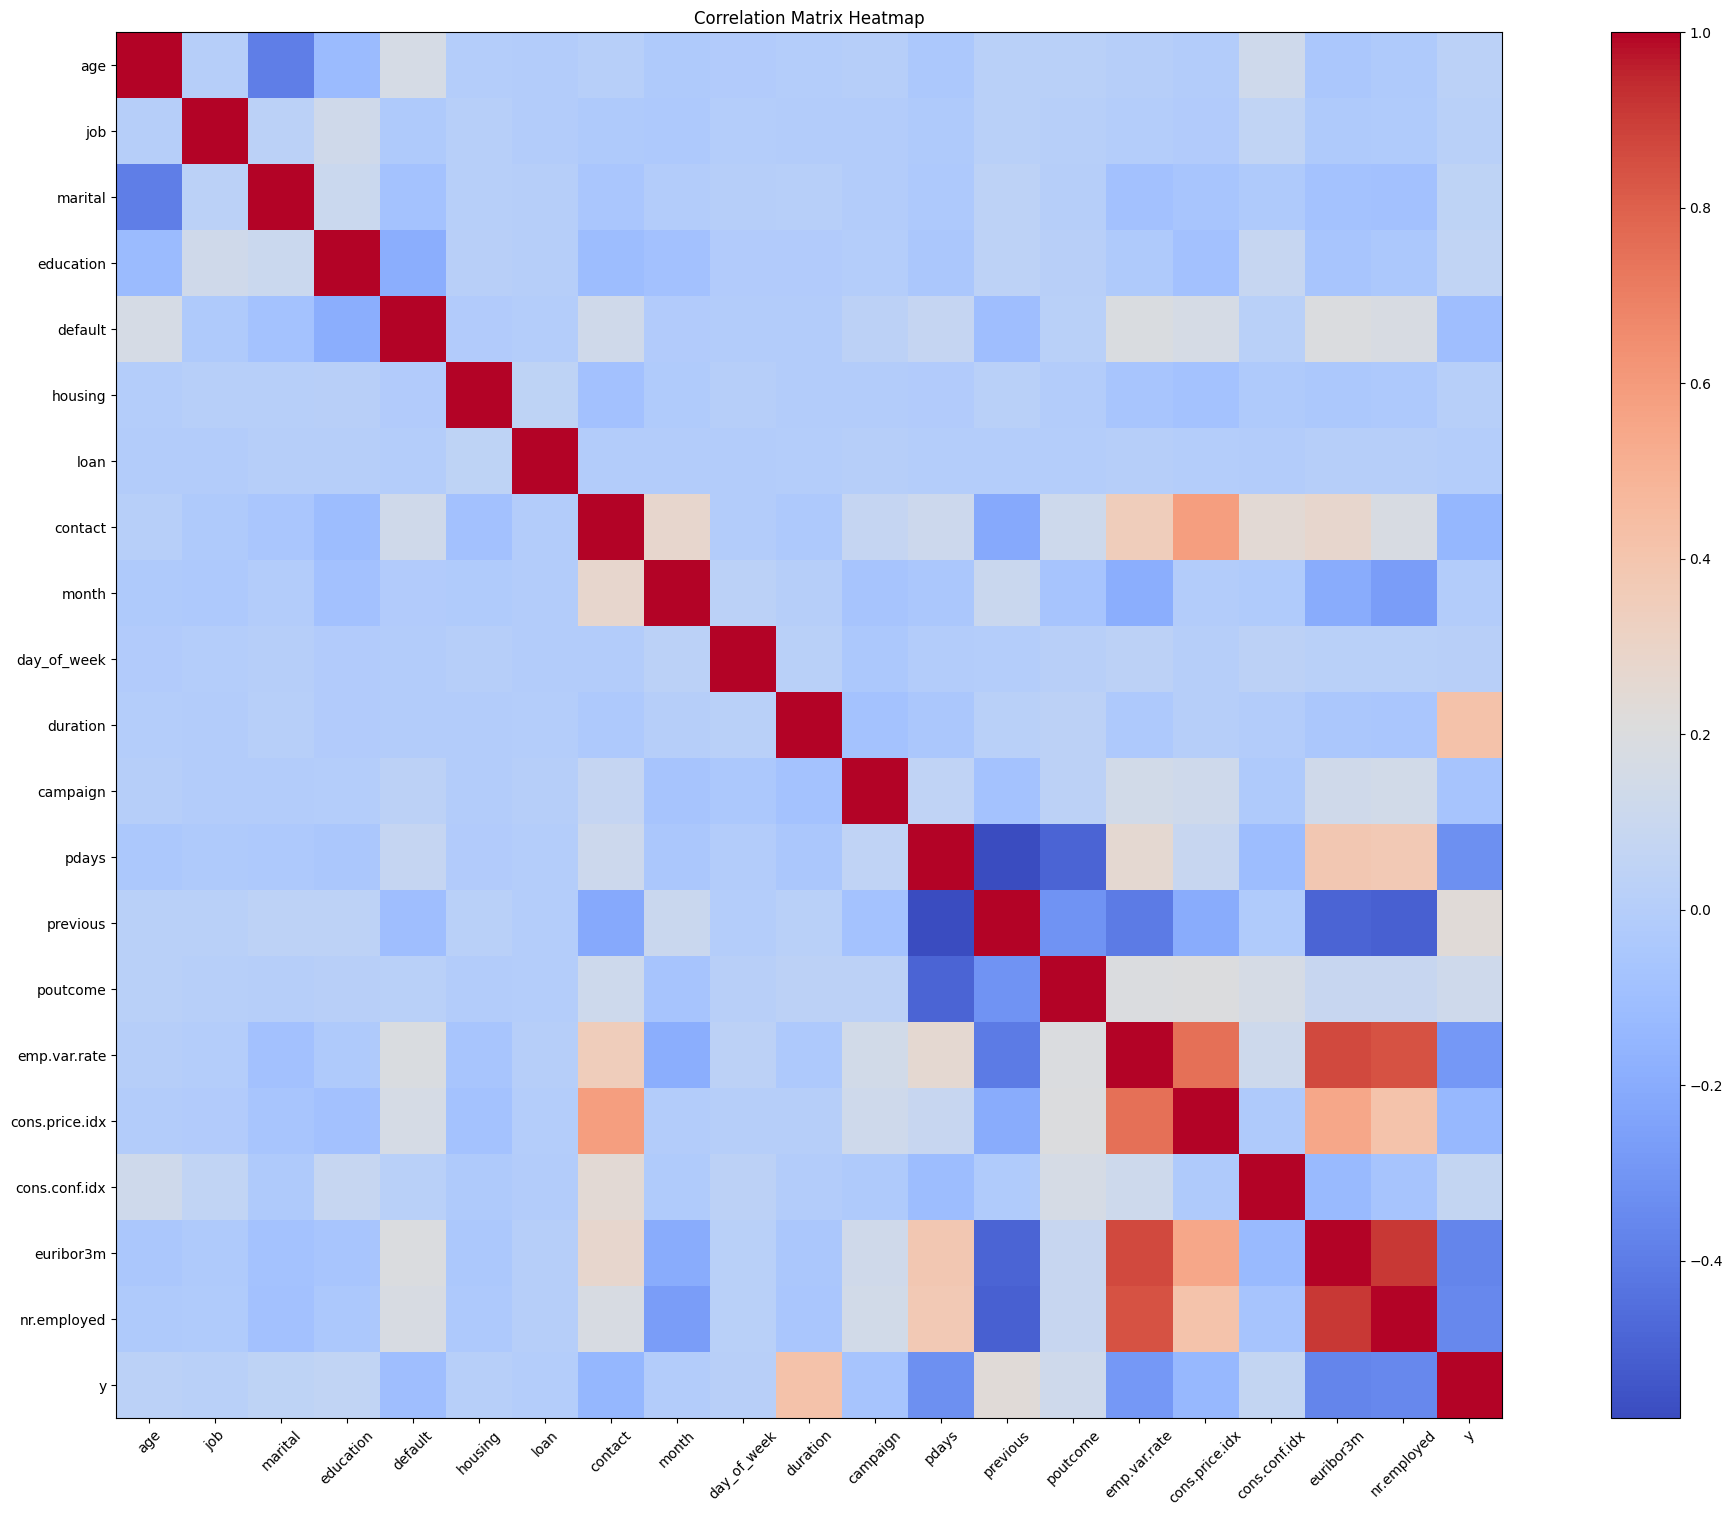

In [18]:
data_corralation = data.corr()

data_corralation

# Create a heatmap
plt.figure(figsize=(28, 18))
plt.imshow(data_corralation, cmap='coolwarm', interpolation='none')
plt.colorbar()

# Add labels to the heatmap
plt.xticks(range(len(data_corralation.columns)), data_corralation.columns, rotation=45)
plt.yticks(range(len(data_corralation.index)), data_corralation.index)

# Add title
plt.title('Correlation Matrix Heatmap')

plt.show()

In [3]:
x = data.drop(["y"], axis=1)
y = data["y"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(x_train,y_train)

y_predict = model.predict(x_test)

print("y_predict:", y_predict)

y_predict: [0 0 0 ... 0 1 0]


In [5]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test,y_predict)
f1_score = f1_score(y_test,y_predict)
confusion_matrix = confusion_matrix(y_test,y_predict)

print("accuracy score:", acc_score)
print("f1 score:", f1_score)
print("confusion_matrix:", confusion_matrix)

accuracy score: 0.9115076474872542
f1 score: 0.5281553398058253
confusion_matrix: [[7101  202]
 [ 527  408]]
